In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

## Bagging Classifier

In [22]:
# Generate a random classification problem
X, y = make_classification(n_samples=100, n_features=4,n_informative=2, n_redundant=0,
                          random_state=0, shuffle=False)

In [23]:
X

array([[ 4.22341441e-01, -2.05321581e+00,  9.10178908e-01,
         3.17218215e-01],
       [-1.25732069e+00, -3.19826339e+00,  7.86327962e-01,
        -4.66419097e-01],
       [ 1.23195055e+00, -9.95105317e-01, -9.44446256e-01,
        -4.10049693e-01],
       [-4.37843295e-02, -1.27395967e+00, -1.70204139e-02,
         3.79151736e-01],
       [-1.30819171e+00, -1.28532883e+00,  2.25930895e+00,
        -4.22571517e-02],
       [-1.62073375e+00, -2.22244349e+00, -9.55945000e-01,
        -3.45981776e-01],
       [-3.59967304e-01, -1.41363563e+00, -4.63595975e-01,
         4.81481474e-01],
       [-7.62884416e-01, -1.45125944e+00, -1.54079701e+00,
         6.32619942e-02],
       [ 4.86681188e-01, -1.45709006e+00,  1.56506538e-01,
         2.32181036e-01],
       [-2.68051210e-01, -4.47369310e-01, -5.97316069e-01,
        -2.37921730e-01],
       [-3.69743600e+00, -4.61220130e-01, -1.42406091e+00,
        -4.93319883e-01],
       [ 1.83324682e-01, -7.66054695e-01, -5.42861476e-01,
      

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

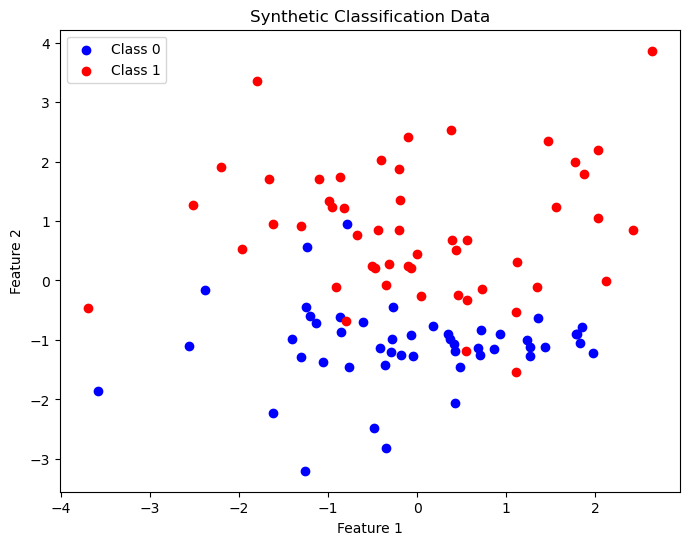

In [25]:
import matplotlib.pyplot as plt
# Visualize the generated data
plt.figure(figsize=(8, 6))

# Plot points for each class
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y== 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

# Add labels and a legend
plt.title('Synthetic Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()

### instead of using 1 model I use 10 SVM models 


In [26]:
# Initialize the Bagging classifier with SVC as the base estimator
clf = BaggingClassifier(SVC(),n_estimators=10, random_state=0).fit(X, y)
clf

BaggingClassifier(estimator=SVC(), random_state=0)

In [11]:
pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: d:\ANACONDA\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: Customer-Personality-Analysis, daal4py, DimondPricePrediction, imbalanced-learn, scikit-learn-intelex, shap
Note: you may need to restart the kernel to use updated packages.


single value prediction 

In [15]:

clf.predict([[0,0,0,0]])

array([1])

In [14]:
clf2 = BaggingClassifier().fit(X, y)
clf2

BaggingClassifier()

By deafult decisionTreeClassifier will be the model. And number of estimators will be  b y default

In [16]:
clf2.predict([[0,0,0,0]])

array([1])

Single prediction on SVM()

In [17]:
clf.predict([[ 4.22341441e-01, -2.05321581e+00,  9.10178908e-01,
         3.17218215e-01]])

array([0])

Single prediction on DT

In [18]:
clf2.predict([[ 4.22341441e-01, -2.05321581e+00,  9.10178908e-01,
         3.17218215e-01]])

array([0])

### Can you use a bagging classifier already build as an estimator for the another BaggingClassifier??

# YES

In [27]:
clf3 =  BaggingClassifier(clf,n_estimators=10, random_state=0).fit(X, y)
clf3

BaggingClassifier(estimator=BaggingClassifier(estimator=SVC(), random_state=0),
                  random_state=0)

## **clf3 is a two-tier ensemble model.**

* The first tier (inside clf) creates an ensemble of SVC classifiers, and the second tier (the clf3 itself) is an ensemble of these ensembles.
*  This approach is quite complex and not commonly used, as it involves multiple layers of randomness and aggregation, which can make the model more challenging to interpret and potentially lead to overfitting. 

In [28]:
clf4 = BaggingClassifier(clf2,n_estimators=10, random_state=0).fit(X, y)
clf4

BaggingClassifier(estimator=BaggingClassifier(), random_state=0)

## **clf4 is a two-tier ensemble model.**

* The first tier (inside clf) creates an ensemble of SVC classifiers, and the second tier (the clf4 itself) is an ensemble of these ensembles.
*  This approach is quite complex and not commonly used, as it involves multiple layers of randomness and aggregation, which can make the model more challenging to interpret and potentially lead to overfitting. 